# Figuras del reporte

In [1]:
from utils import *
from utils1 import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
from utils3 import *

# Solución de la ecuación `poner numero de ecuacion`

In [48]:
def g(t,y):
    if np.abs(y)<0.01:
        return 1
    else:
        return np.sqrt(4*y**2-4*y**4)/(2*y**2)




In [51]:
a,b =-1,0
alpha=0.01
sol2=RK4(g,a,b,alpha,N=1000)
print(sol2[0])

[-1.00e+00 -9.99e-01 -9.98e-01 -9.97e-01 -9.96e-01 -9.95e-01 -9.94e-01
 -9.93e-01 -9.92e-01 -9.91e-01 -9.90e-01 -9.89e-01 -9.88e-01 -9.87e-01
 -9.86e-01 -9.85e-01 -9.84e-01 -9.83e-01 -9.82e-01 -9.81e-01 -9.80e-01
 -9.79e-01 -9.78e-01 -9.77e-01 -9.76e-01 -9.75e-01 -9.74e-01 -9.73e-01
 -9.72e-01 -9.71e-01 -9.70e-01 -9.69e-01 -9.68e-01 -9.67e-01 -9.66e-01
 -9.65e-01 -9.64e-01 -9.63e-01 -9.62e-01 -9.61e-01 -9.60e-01 -9.59e-01
 -9.58e-01 -9.57e-01 -9.56e-01 -9.55e-01 -9.54e-01 -9.53e-01 -9.52e-01
 -9.51e-01 -9.50e-01 -9.49e-01 -9.48e-01 -9.47e-01 -9.46e-01 -9.45e-01
 -9.44e-01 -9.43e-01 -9.42e-01 -9.41e-01 -9.40e-01 -9.39e-01 -9.38e-01
 -9.37e-01 -9.36e-01 -9.35e-01 -9.34e-01 -9.33e-01 -9.32e-01 -9.31e-01
 -9.30e-01 -9.29e-01 -9.28e-01 -9.27e-01 -9.26e-01 -9.25e-01 -9.24e-01
 -9.23e-01 -9.22e-01 -9.21e-01 -9.20e-01 -9.19e-01 -9.18e-01 -9.17e-01
 -9.16e-01 -9.15e-01 -9.14e-01 -9.13e-01 -9.12e-01 -9.11e-01 -9.10e-01
 -9.09e-01 -9.08e-01 -9.07e-01 -9.06e-01 -9.05e-01 -9.04e-01 -9.03e-01
 -9.02

In [52]:
print(sol2[1])

[0.01       0.05298033 0.06930669 0.0824479  0.09375426 0.10382705
 0.11299668 0.12146786 0.12937787 0.13682406 0.14387847 0.15059617
 0.15702037 0.16318575 0.1691206  0.17484842 0.18038891 0.18575885
 0.19097262 0.19604268 0.20097991 0.20579386 0.210493   0.21508486
 0.21957615 0.22397294 0.22828068 0.23250432 0.23664837 0.24071693
 0.24471377 0.24864236 0.25250587 0.25630724 0.26004921 0.26373431
 0.26736487 0.2709431  0.27447105 0.27795062 0.28138361 0.28477171
 0.2881165  0.29141947 0.29468203 0.29790551 0.30109115 0.30424016
 0.30735365 0.31043269 0.3134783  0.31649145 0.31947305 0.32242397
 0.32534506 0.32823711 0.33110088 0.33393709 0.33674645 0.33952962
 0.34228724 0.34501992 0.34772825 0.35041279 0.35307409 0.35571267
 0.35832903 0.36092366 0.36349701 0.36604954 0.36858169 0.37109386
 0.37358646 0.37605988 0.37851449 0.38095067 0.38336876 0.3857691
 0.38815201 0.39051783 0.39286686 0.39519939 0.39751572 0.39981613
 0.4021009  0.40437028 0.40662453 0.40886392 0.41108867 0.41329

In [ ]:

integrando=np.pi*solu**2
x = t
y = integrando
integral = integrate.cumtrapz(y, x, initial = a)
integral=integral[-1]-integral[0]

## Grafica 1

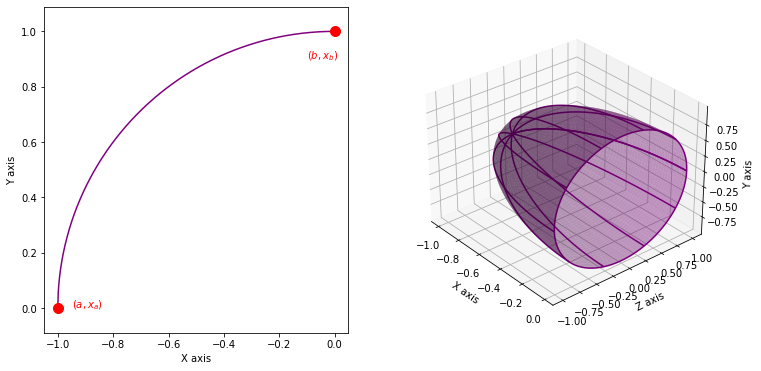

In [61]:
n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =-1,0

#initial conditions
xa, xb= 0, 1

#dominio de la funcion
t=np.arange(a,b, step=0.001)

#funcion solucion evaluada en cada t
y_t=sol2[1]#np.sqrt(1-t**2)

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(a+0.05,xa, '$(a,x_a)$', color='red')
ax1.text(b-0.1, xb-0.1, '$(b,x_b)$', color='red')
#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()

# Superficies de Delaunay

Probaremos diferentes configurtaciones de los hiperparametros para obtener las superficies de Delaunay. Recordemos que la ecuación a resolver es:
$$
    \dot{x}=\pm\frac{\sqrt{4x^2-(\lambda x^2-k_1)^2}}{\lambda x^2-k_1}
$$

# Primer superficie

Probaremos un grid search sobre $[-10,10]\times[-2,2]$ y condiciones de contorno
$$
a=-2\\
b=10\\
x_a=10\\
x_b=1196\\
vol=5615200
$$

In [5]:
k1= np.arange(start=-10, stop=10, step=1, dtype=float) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.arange(start=-2,stop=2, step=0.1, dtype=float) #hiperparametro de la EDO

#condiciones de controno
a= -2
b= 10
xa= 10
xb= 1196
vol= 5615200

# Primer sup de Delaunay: Catenoide

In [6]:
superficie1=delaunay(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb,vol=vol)

La condicion final se satisface salvo un error de 0.0005560663357114725
Volumen aproximado 5610712.72726831
error relativo entre volumen y volumen aprox 0.0007991296359327782
Se encontró una solución tal que
Los parametros que mejor se ajustan son k, lambda= 1.7763568394002505e-15 -5.0
El volumen de la mejor superficie es 5610712.72726831
El error relativo entre el volumen objetivo y volumen aproximado es 4487.272731689736
El error relativo entre condicion final objetivo y fin de la solucion aproximada es 4487.272731689736


In [7]:
print(superficie1)

(array([-2.   , -1.999, -1.998, ...,  9.997,  9.998,  9.999]), array([  10.        ,   10.00387378,   10.00774917, ..., 1194.3790612 ,
       1194.85690734, 1195.33494466]), 5610712.72726831, 4487.272731689736, (1.7763568394002505e-15, -5.0))


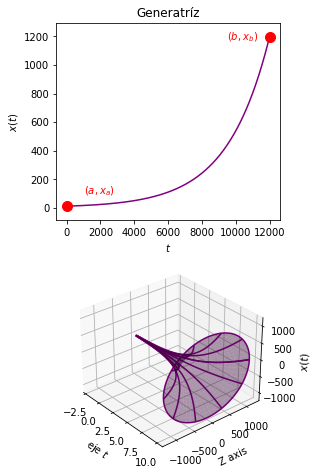

In [8]:
n = 100

#funcion solucion evaluada en cada t
y_t=superficie1[1]

#dominio de la parametrizacion
t=superficie1[0]
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#fig.suptitle('Generatriz y catenoide')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(0,12000,step=1),y_t,'purple')
ax.plot(a, xa,12000,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
ax.text(1000, 100, '$(a,x_a)$', color='red')
ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(ymin=xa-100,ymax=xb+100)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 2, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')
plt.show()

A partir de ésta podemos generar una catenoide, reflejando la curva solución respecto al eje $y$ y *soldandola*

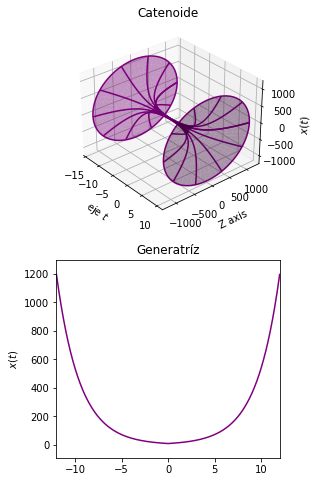

In [32]:
n = 100

#dominio de la parametrizacion
t1=np.arange(-14,10,0.001)
y_t1=np.concatenate([np.flip(superficie1[1]),superficie1[1]])
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t1, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t1 #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica
ax.title.set_text('Catenoide')
#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(-12,12,step=0.001),y_t1,'purple')
#ax.plot(-a, xa,12000,xb, marker="o", markersize=10, markeredgecolor="red", 
       #  markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1, 100, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(xmin=-12,xmax=12)
ax.axis(ymin=xa-100,ymax=xb+100)
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')
plt.show()

# Superficie 2

## Funcion Delaunay 1

In [52]:
k1= np.arange(start=-5, stop=5, step=1, dtype=float) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.arange(start=-1,stop=1, step=0.1, dtype=float) #hiperparametro de la EDO

#condiciones de controno
a= -2
b= 19.33
xa= 10
xb= -10
vol= 4191.2

In [53]:
superficie2=delaunay(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb,vol=vol)

La condicion final se satisface salvo un error de -4993.018336281571
Volumen aproximado 9786157939.32103
error relativo entre volumen y volumen aprox 2334928.838547678
La condicion final se satisface salvo un error de -42377.59825278619
Volumen aproximado 564156928783.9352
error relativo entre volumen y volumen aprox 134605107.03205174
La condicion final se satisface salvo un error de -1501544.4251865938
Volumen aproximado 526802854444941.1
error relativo entre volumen y volumen aprox 125692606995.78879
La condicion final se satisface salvo un error de -14304.107292873648
Volumen aproximado 1.3416217873527532e+16
error relativo entre volumen y volumen aprox 3201044539397.6284
La condicion final se satisface salvo un error de -52535279.86176865
Volumen aproximado 6.405008682209116e+18
error relativo entre volumen y volumen aprox 1528204018469439.0
La condicion final se satisface salvo un error de -0.9957069835924302
Volumen aproximado 15544.534341885945
error relativo entre volumen y vo

In [54]:
print(superficie2)

None


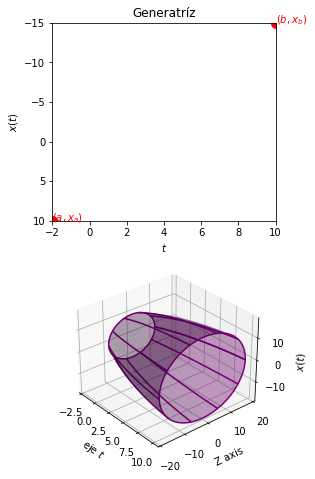

In [46]:
n = 100

#funcion solucion evaluada en cada t
y_t=superficie2[1]

#dominio de la parametrizacion
t=superficie2[0]
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#fig.suptitle('Generatriz y catenoide')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(a,b,step=0.001),y_t,'purple')
ax.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
ax.text(a, xa, '$(a,x_a)$', color='red')
ax.text(b, xb, '$(b,x_b)$', color='red')
ax.axis(xmin=a,xmax=b)
ax.axis(ymin=xa,ymax=xb)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 2, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')
plt.show()

## Funcion Delaunay 2

In [3]:
k1= np.arange(start=-5, stop=5, step=1, dtype=float) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.arange(start=-2,stop=2, step=0.1, dtype=float) #hiperparametro de la EDO

#condiciones de controno
a= 0
b= 12
xa= 5
xb= 20

In [4]:
superficie2=delaunay2(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb)

1 Se encontró una solución tal que
Los parametros que mejor se ajustan son k, lambda= 0.10000000000000187 1.0
El volumen de la mejor superficie es 8677.61390544016
El error abs entre condicion final objetivo y fin de la solucion aproximada es 1


In [5]:
print(superficie2)

(array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.1997e+01, 1.1998e+01,
       1.1999e+01]), array([ 5.        ,  5.0065809 ,  5.01314127, ..., 19.24208609,
       19.24246174, 19.24283733]), 8677.61390544016, (0.10000000000000187, 1.0))


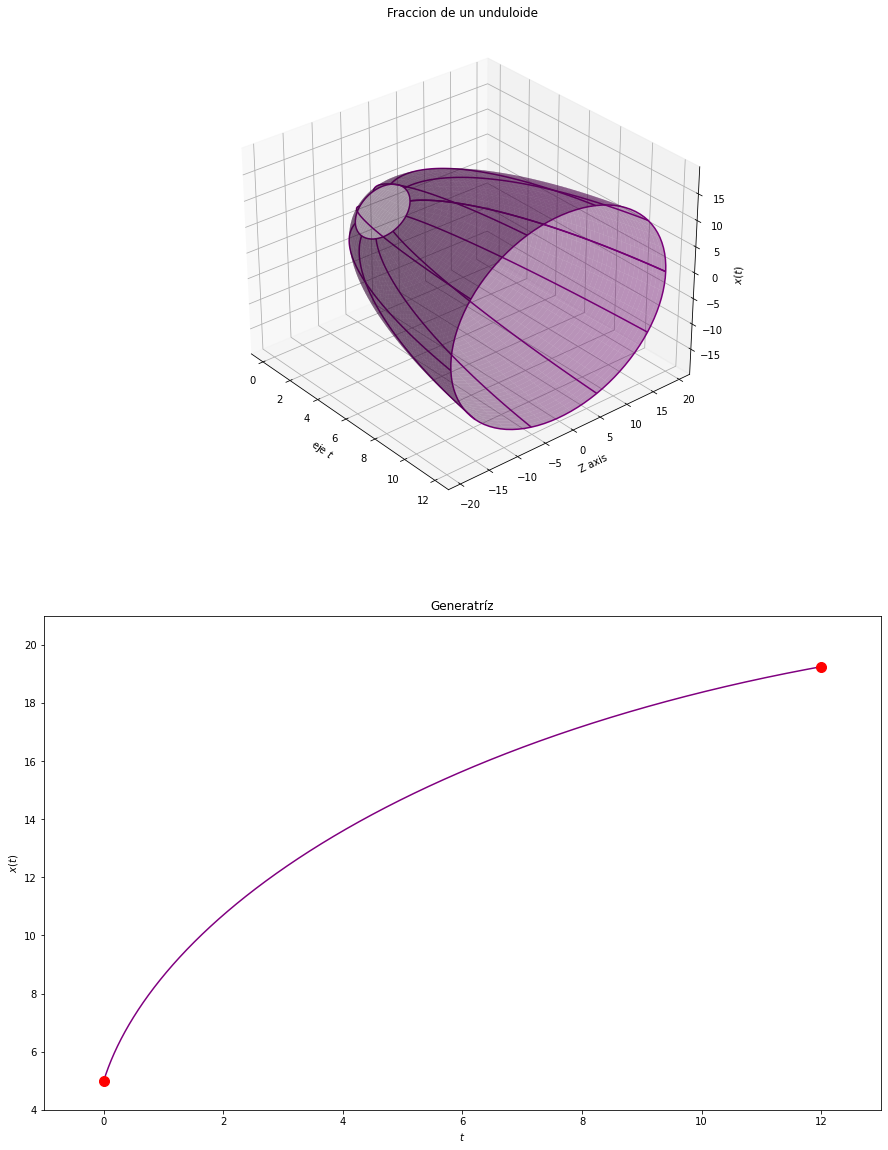

In [10]:
n = 100

#funcion solucion evaluada en cada t
y_t=superficie2[1]

#dominio de la parametrizacion
t=superficie2[0]
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=(15,20))
#fig.suptitle('Generatriz y catenoide')
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Fraccion de un unduloide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 2)
ax.plot(t,y_t,'purple')
ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1000, 17, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(xmin=a-1,xmax=b+1)
ax.axis(ymin=xa-1,ymax=xb+1)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

plt.show()

Soldando para generar unduloide

In [7]:
#funcion solucion evaluada en cada t
y_t=superficie2[1]

#dominio de la parametrizacion
t=superficie2[0]

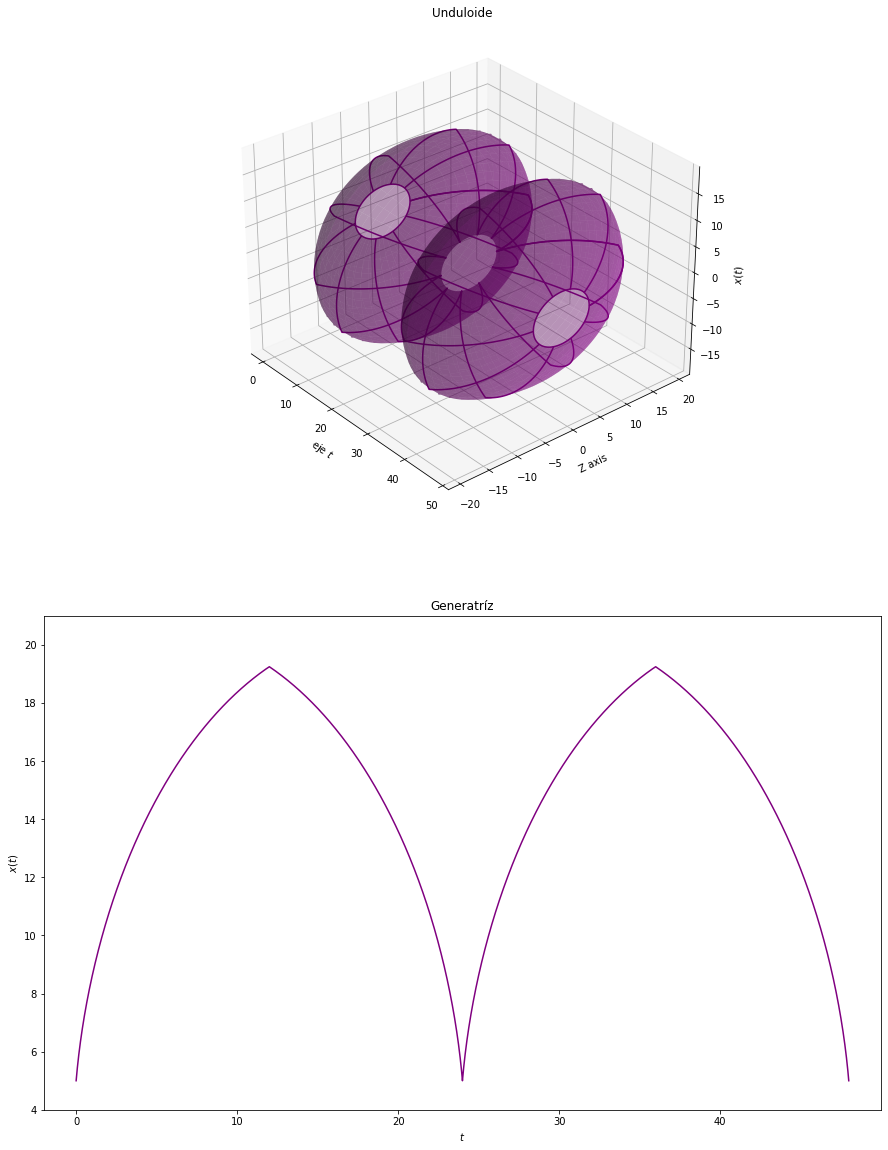

In [9]:
n = 100
t1=t[-1]+np.abs(t[-1]-np.flip(t))
yt1=np.flip(y_t)
t=np.concatenate([t,t1])
y_t=np.concatenate([y_t,yt1])

theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=(15,20))
#fig.suptitle('Generatriz y catenoide')
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Unduloide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 2)
ax.plot(t,y_t,'purple')
#ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
 #        markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1000, 17, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(xmin=t[0]-2,xmax=t[-1]+2)
ax.axis(ymin=xa-1,ymax=xb+1)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

plt.show()

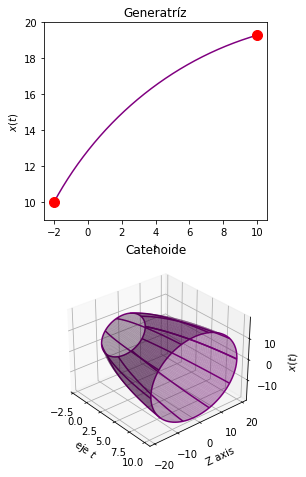

In [8]:
n = 100

#funcion solucion evaluada en cada t
y_t=superficie2[1]

#dominio de la parametrizacion
t=superficie2[0]
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#fig.suptitle('Generatriz y catenoide')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 1)
ax.plot(t,y_t,'purple')
ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1000, 17, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(ymin=xa-1,ymax=xb+1)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 2, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Catenoide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')
plt.show()

## Superficie 3: Undulonoide

In [ ]:
def r(t,y):
    lam=
    k=
    valor=(np.sqrt(4*x**2-(lam*x**2-k)**2))/(lam*x**2-k)
    return valor

In [ ]:
def g(t,y):
    if np.abs(y)<0.01:
        return 1
    else:
        return np.sqrt(4*y**2-4*y**4)/(2*y**2)